## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing files

In [2]:
google_play= pd.read_csv('UTF_googleplaystore.csv')
google_play.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,U Launcher Lite ��������� FREE Live Cool Theme...,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Performing EDA

In [3]:
google_play.shape

(10841, 13)

In [4]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10841 non-null  object 
 1   Category         10841 non-null  object 
 2   Rating           9367 non-null   float64
 3   Reviews          10841 non-null  object 
 4   Size             10841 non-null  object 
 5   Installs         10841 non-null  object 
 6   Type             10840 non-null  object 
 7   Price            10841 non-null  object 
 8   Content Rating   10840 non-null  object 
 9   Genres           10841 non-null  object 
 10  Last Updated     10841 non-null  object 
 11  Current Version  10833 non-null  object 
 12  Android Version  10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
google_play.replace('NaN', np.NaN, inplace= True)

In [6]:
google_play['Reviews'].replace('3.0M',3000000,inplace=True)

In [7]:
google_play['Reviews']= pd.to_numeric(google_play['Reviews']) 

In [8]:
google_play['Rating'].replace({
    np.NaN:0,
    19: 1.9,
    1: 1.0,
    2: 2.0,
    3: 3.0,
    4: 4.0,
    5: 5.0}, inplace=True)

In [9]:
google_play['Installs'].replace({
    '0+':0,
    'Free':0}, inplace=True)

In [10]:
google_play['Type'].replace(np.NaN,0, inplace=True)

In [11]:
google_play["Content Rating"].replace(np.NaN, 'Unrated', inplace=True)

In [12]:
google_play["Current Version"].replace(np.NaN, 0, inplace=True)

In [13]:
google_play['Android Version'].replace(np.NaN,0, inplace=True)

In [14]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10841 non-null  object 
 1   Category         10841 non-null  object 
 2   Rating           10841 non-null  float64
 3   Reviews          10841 non-null  int64  
 4   Size             10841 non-null  object 
 5   Installs         10841 non-null  object 
 6   Type             10841 non-null  object 
 7   Price            10841 non-null  object 
 8   Content Rating   10841 non-null  object 
 9   Genres           10841 non-null  object 
 10  Last Updated     10841 non-null  object 
 11  Current Version  10841 non-null  object 
 12  Android Version  10841 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


## Which is the most used Android Version

In [15]:
most_used=google_play['Android Version'].replace(0, np.NaN)

In [16]:
most_used.dropna().value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Version, dtype: int64

<AxesSubplot:>

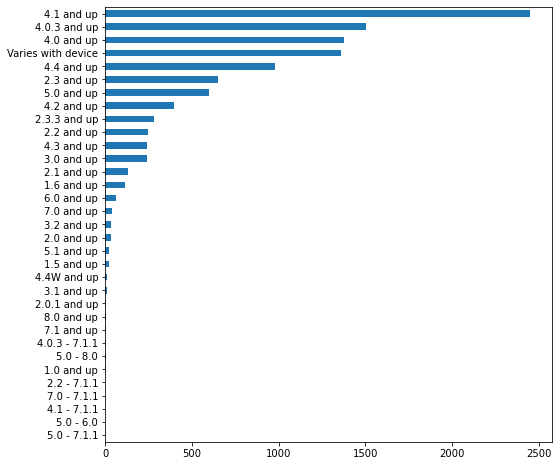

In [17]:
plt.figure(figsize=(8,8))
most_used.dropna().value_counts(ascending=True).plot.barh()

###### The most used Android Version in the data set is 4.1 and up.

## Which all categories of mobile apps are existing in this dataset.

In [18]:
cat_app= google_play["Category"].unique()
cat_app

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

## How does the market size vary by app category (in percentage).

In [19]:
cata_apps= google_play[['App', "Category"]]
cata_apps.head(5)

,App,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN
2,U Launcher Lite ��������� FREE Live Cool Theme...,ART_AND_DESIGN
3,Sketch - Draw & Paint,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN


#### Finding the market size of top 17 apps catagory

In [20]:
cata_apps_group= cata_apps.groupby("Category")
cata_apps_group

In [21]:
cata_apps_group.get_group("ART_AND_DESIGN").head(6)

,App,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN
2,U Launcher Lite ��������� FREE Live Cool Theme...,ART_AND_DESIGN
3,Sketch - Draw & Paint,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN
5,Paper flowers instructions,ART_AND_DESIGN


In [22]:
for_pie=cata_apps_group.count()
for_pie

,App
Category,
1.9,1
ART_AND_DESIGN,65
AUTO_AND_VEHICLES,85
BEAUTY,53
BOOKS_AND_REFERENCE,231
BUSINESS,460
COMICS,60
COMMUNICATION,387
DATING,234


In [23]:
top_17= for_pie.nlargest(17, 'App')
top_17

,App
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


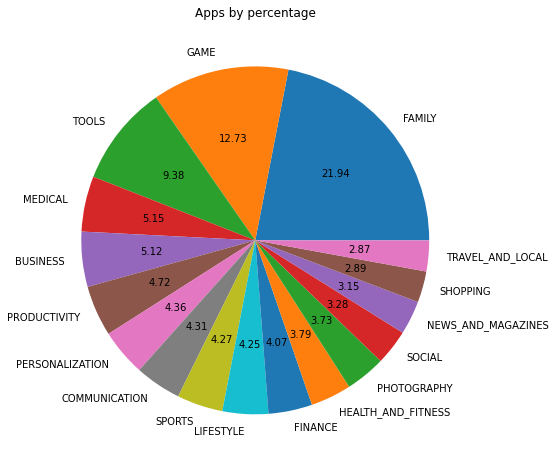

In [24]:
plt.figure(figsize=(8,8))
plt.title('Apps by percentage')
plt.pie(top_17['App'],  autopct = '%.2f',labels = top_17.index)
plt.show()

## Which are the apps which has 5 star rating 

In [25]:
google_play.head(3) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,U Launcher Lite ��������� FREE Live Cool Theme...,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [26]:
rate= google_play[['App', 'Category', 'Rating']]
rate

,App,Category,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1
1,Coloring book moana,ART_AND_DESIGN,3.9
2,U Launcher Lite ��������� FREE Live Cool Theme...,ART_AND_DESIGN,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3
...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0
10838,Parkinson Exercices FR,MEDICAL,0.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5


In [27]:
rate[rate['Rating']>=5]

,App,Category,Rating
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0
612,American Girls Mobile Numbers,DATING,5.0
615,Awake Dating,DATING,5.0
633,Spine- The dating app,DATING,5.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0
...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0
10742,GKPB FP Online Church,LIFESTYLE,5.0
10776,Monster Ride Pro,GAME,5.0
10820,Fr. Daoud Lamei,FAMILY,5.0


## Which are the top 10 mobile apps based on rating

In [28]:
rate[rate['Rating']>=5].head(10)

,App,Category,Rating
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0
612,American Girls Mobile Numbers,DATING,5.0
615,Awake Dating,DATING,5.0
633,Spine- The dating app,DATING,5.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0
640,Online Girls Chat Group,DATING,5.0
654,Speeding Joyride & Car Meet App,DATING,5.0
1028,SUMMER SONIC app,EVENTS,5.0
1030,Prosperity,EVENTS,5.0
1038,Mindvalley U Tallinn 2018,EVENTS,5.0


## What is the overall market size in terms of  revenue

In [29]:
revenue=google_play[['Category','Price']]
revenue.head(3)

,Category,Price
0,ART_AND_DESIGN,0
1,ART_AND_DESIGN,0
2,ART_AND_DESIGN,0


In [30]:
revenue= revenue.rename(columns={'Price':'Price in DOLLARS'})
revenue

,Category,Price in DOLLARS
0,ART_AND_DESIGN,0
1,ART_AND_DESIGN,0
2,ART_AND_DESIGN,0
3,ART_AND_DESIGN,0
4,ART_AND_DESIGN,0
...,...,...
10836,FAMILY,0
10837,FAMILY,0
10838,MEDICAL,0
10839,BOOKS_AND_REFERENCE,0


In [31]:
rec= revenue[revenue['Price in DOLLARS']!= "0"]
rec

,Category,Price in DOLLARS
234,BUSINESS,$4.99
235,BUSINESS,$4.99
290,BUSINESS,$4.99
291,BUSINESS,$4.99
427,COMMUNICATION,$3.99
...,...,...
10735,FAMILY,$0.99
10760,HEALTH_AND_FITNESS,$7.99
10782,GAME,$16.99
10785,FAMILY,$1.20


In [32]:
rec['Price in DOLLARS']= rec['Price in DOLLARS'].str.replace('$','', regex= True).astype(float)
rec

C:\Users\Personal\AppData\Local\Temp/ipykernel_24636/1404126188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['Price in DOLLARS']= rec['Price in DOLLARS'].str.replace('$','', regex= True).astype(float)


,Category,Price in DOLLARS
234,BUSINESS,4.99
235,BUSINESS,4.99
290,BUSINESS,4.99
291,BUSINESS,4.99
427,COMMUNICATION,3.99
...,...,...
10735,FAMILY,0.99
10760,HEALTH_AND_FITNESS,7.99
10782,GAME,16.99
10785,FAMILY,1.20


In [33]:
rec_group= rec.groupby('Category')
rec_group

In [34]:
rec_group_sum= rec_group.sum()
rec_group_sum

,Price in DOLLARS
Category,
ART_AND_DESIGN,5.97
AUTO_AND_VEHICLES,13.47
BOOKS_AND_REFERENCE,119.77
BUSINESS,185.27
COMMUNICATION,83.14
DATING,31.43
EDUCATION,17.96
ENTERTAINMENT,7.98
EVENTS,109.99


In [35]:
rec_group_sum_asc= rec_group_sum.nlargest(30, 'Price in DOLLARS')
rec_group_sum_asc

,Price in DOLLARS
Category,
FINANCE,2900.83
FAMILY,2434.78
LIFESTYLE,2360.87
MEDICAL,1439.96
GAME,287.30
TOOLS,267.25
PRODUCTIVITY,250.93
BUSINESS,185.27
PERSONALIZATION,153.96


In [36]:
rec_pie= rec_group_sum.nlargest(15, 'Price in DOLLARS')
rec_pie

,Price in DOLLARS
Category,
FINANCE,2900.83
FAMILY,2434.78
LIFESTYLE,2360.87
MEDICAL,1439.96
GAME,287.30
TOOLS,267.25
PRODUCTIVITY,250.93
BUSINESS,185.27
PERSONALIZATION,153.96


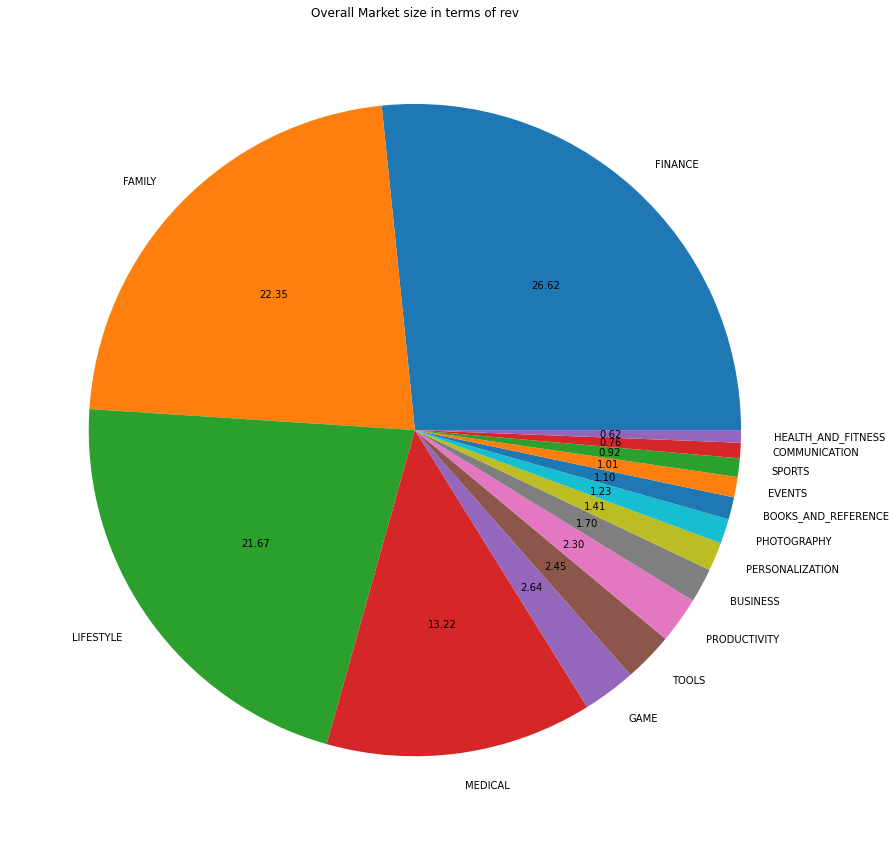

In [37]:
plt.figure(figsize=(15,15))
plt.title('Overall Market size in terms of rev')
plt.pie(rec_pie["Price in DOLLARS"], autopct = '%.2f',labels = rec_pie.index)
plt.show()